In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv("./data/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Drop unnecessary columns
df.drop(["name", "id", "host_name", "last_review"], inplace=True, axis=1)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [8]:
# count missing data
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by= 'Count', ascending= False)

,Count,%
reviews_per_month,10052,20.558339
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000


In [9]:
# Fill "0" for missing values in reviews_per_month
df['reviews_per_month'].fillna(0, inplace=True)

In [10]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
# recheck missing data
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
for column in df.select_dtypes("object").columns:
  df[column] = df[column].astype("category")

In [13]:
# recheck data types
df.dtypes

host_id                              int64
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

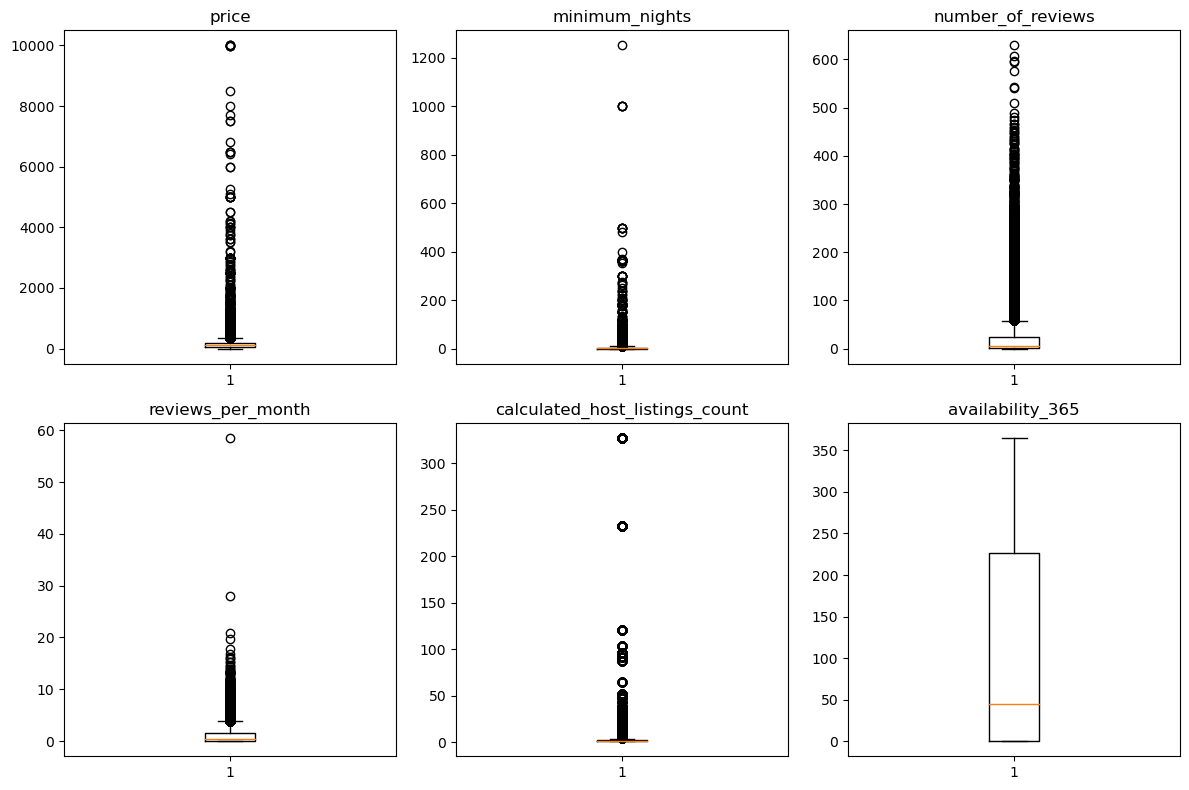

In [14]:
# Select numerical columns for outlier analysis
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Visualize boxplots for each numerical variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Price: The 'price' variable shows some extreme values that are significantly higher than the majority of prices. These extreme values may indicate listings with exceptionally high prices or potential data entry errors.

Minimum Nights: The 'minimum_nights' variable exhibit some extreme values beyond the whiskers. Most listings have minimum stay requirements within a reasonable range.

Number of Reviews: The 'number_of_reviews' variable contains a few extreme values that represent listings with a significantly higher number of reviews compared to the majority of listings. These outliers could indicate highly popular or controversial listings.

Reviews per Month: The 'reviews_per_month' variable exhibits extreme values that are much higher than the majority of listings. These outliers suggest that some listings have an unusually high number of reviews per month.

Calculated Host Listing Count:  These outliers indicate a small number of hosts who have a significantly higher number of listings compared to the majority of hosts. These hosts may be managing multiple properties or have unique circumstances that allow them to list a larger number of properties. 

Availability: The 'availability_365' variable shows outliers representing listings with availability beyond the typical range. These outliers indicate listings that are available for a larger portion of the year compared to the majority of listings.

In [15]:
# Save the cleaned dataset
df.to_csv('./data/cleaned_df.csv', index=False)